In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('/Users/rika/Downloads/final_bc_data.csv')

In [9]:
df.head()

,State/territory,SA3 code,SA3 name,Participated,Invited,Participation (%),Year,postcode,long,lat,...,Highest_year_of_school_completed_Year_9,Highest_year_of_school_completed_Year_8,Highest_year_of_school_completed_Did_not_go_to_school,Percentage_Total_Aged_55-74,Median_age_of_persons,Median_mortgage_repayment_monthly,Median_total_personal_income_weekly,Median_rent_weekly,Median_total_household_income_weekly,Average_household_size
0,NSW,10102,Goulburn - Yass,590.152381,554.7,38.5,2015,"2584, 2584, 2585, 2586, 2586, 2586, 2586, 2586...",148.555243,-34.711018,...,2313.0,1597.0,209.0,0.21,38.0,2167.0,1155.0,355.0,2290.0,2.6
1,NSW,10103,Queanbeyan,590.152381,554.7,38.9,2015,"2581, 2581, 2581, 2581, 2581, 2581, 2581, 2581...",149.286631,-34.764484,...,1061.0,664.0,63.0,0.26,43.0,1408.0,825.0,300.0,1562.0,2.3
2,NSW,10104,Snowy Mountains,989.000000,554.7,40.1,2015,"2625, 2625, 2626, 2626, 2626, 2628, 2628, 2628...",148.301005,-36.506610,...,5118.0,2921.0,183.0,0.36,53.0,1517.0,631.0,320.0,1183.0,2.2
3,NSW,10105,South Coast,590.152381,554.7,44.2,2015,"2537, 2537, 2537, 2537, 2537, 2537, 2537, 2537...",149.912199,-35.939649,...,2677.0,1590.0,140.0,0.27,43.0,1694.0,744.0,310.0,1449.0,2.4
4,NSW,10106,Gosford,590.152381,554.7,36.6,2015,"2251, 2251, 2251, 2251, 2251, 2251, 2251, 2251...",151.401999,-33.482209,...,2280.0,1336.0,118.0,0.26,44.0,1699.0,806.0,270.0,1596.0,2.5


In [10]:
print(df.dtypes)

State/territory                                           object
SA3 code                                                   int64
SA3 name                                                  object
Participated                                             float64
Invited                                                  float64
Participation (%)                                        float64
Year                                                       int64
postcode                                                  object
long                                                     float64
lat                                                      float64
retirement_home_count                                      int64
Persons_Advanced_and_Associate_Degree                    float64
Persons_Advanced_Diploma                                 float64
Persons_Certificate_Level_Certificate_III_and_IV         float64
Persons_Certificate_Level_Certificate_I_and_II           float64
Persons_Postgraduate_Degr

In [17]:
df.isnull().sum()

State/territory                                          0
SA3 code                                                 0
SA3 name                                                 0
Participated                                             0
Invited                                                  0
Participation (%)                                        0
Year                                                     0
postcode                                                 0
long                                                     0
lat                                                      0
retirement_home_count                                    0
Persons_Advanced_and_Associate_Degree                    0
Persons_Advanced_Diploma                                 0
Persons_Certificate_Level_Certificate_III_and_IV         0
Persons_Certificate_Level_Certificate_I_and_II           0
Persons_Postgraduate_Degree                              0
Persons_Graduate_Diploma_and_Graduate_Certificate       

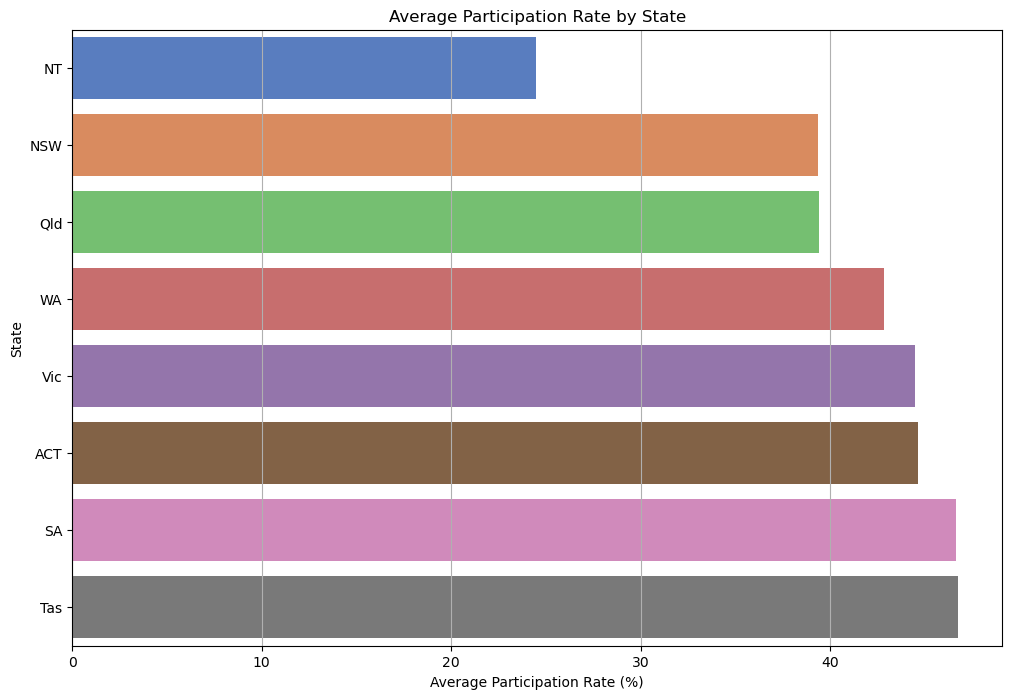

In [19]:
#Bar plot of average participation rate by state

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 8))

# Example 1: Bar plot of average participation rate by state
statewise_participation = df.groupby('State/territory')['Participation (%)'].mean().sort_values()
sns.barplot(x=statewise_participation.values, y=statewise_participation.index, palette='muted')
plt.title('Average Participation Rate by State')
plt.xlabel('Average Participation Rate (%)')
plt.ylabel('State')
plt.grid(axis='x')
plt.show()


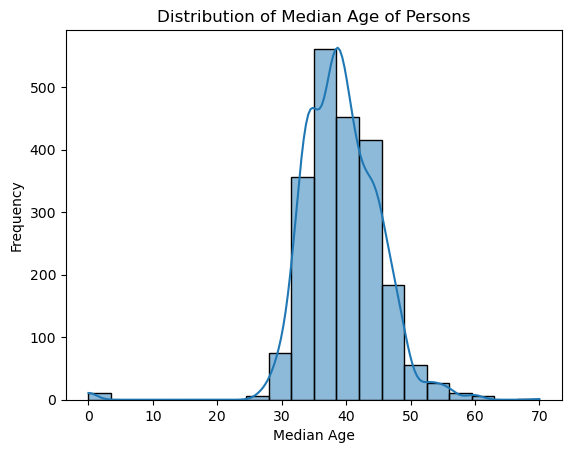

In [20]:
#Distribution of median age of persons
sns.histplot(df['Median_age_of_persons'], bins=20, kde=True,palette='viridis')
plt.title('Distribution of Median Age of Persons')
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.show()

# Random Forest Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
df_encoded = pd.get_dummies(df)

# Separate features (X) and target variable (y)
X = df_encoded.drop('Participation (%)', axis=1)  # Features
y = df_encoded['Participation (%)']  # Target variable




In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)


In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.716479986055557
R-squared: 0.8982745317233989


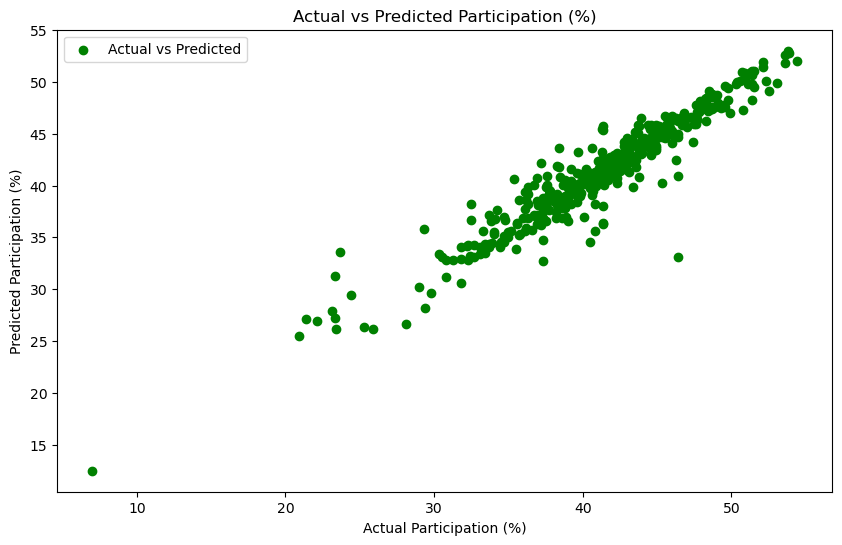

In [25]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Actual vs Predicted')
plt.xlabel('Actual Participation (%)')
plt.ylabel('Predicted Participation (%)')
plt.title('Actual vs Predicted Participation (%)')
plt.legend()
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

#smaller subset of  data
X_train_subset = X_train[:1000]
y_train_subset = y_train[:1000]

# Use parallelization with n_jobs=-1
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)


#  hyperparameter tuning using GridSearchCV for a Random Forest regressor


In [27]:
from sklearn.metrics import mean_absolute_error
grid_search.fit(X_train_subset, y_train_subset)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
y_pred_best = grid_search.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f"Best Model Mean Absolute Error: {mae_best}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Mean Absolute Error: 1.7322869692017278


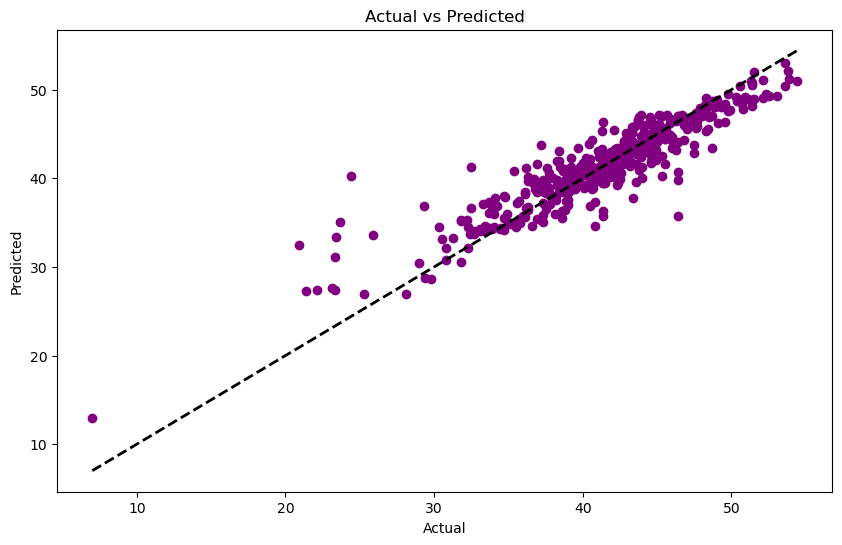

In [28]:
import matplotlib.pyplot as plt

# Make predictions on the test set using the best model
y_pred_best = grid_search.best_estimator_.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Model -2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading the dataset

df = pd.read_csv("/Volumes/DriveA/iLab_work/cervical_cancer/Bowel_Cancer1.csv")

In [2]:
df

,State_and_territory,SA3_name,Year,Participation_Per
0,NSW,Goulburn - Yass,2015,38.5
1,NSW,Queanbeyan,2015,38.9
2,NSW,Snowy Mountains,2015,40.1
3,NSW,South Coast,2015,44.2
4,NSW,Gosford,2015,36.6
...,...,...,...,...
2323,NT,Alice Springs,2021,22.1
2324,NT,Barkly,2021,12.7
2325,NT,Daly - Tiwi - West Arnhem,2021,16.9
2326,NT,East Arnhem,2021,12.4


In [3]:
df.dropna()

,State_and_territory,SA3_name,Year,Participation_Per
0,NSW,Goulburn - Yass,2015,38.5
1,NSW,Queanbeyan,2015,38.9
2,NSW,Snowy Mountains,2015,40.1
3,NSW,South Coast,2015,44.2
4,NSW,Gosford,2015,36.6
...,...,...,...,...
2323,NT,Alice Springs,2021,22.1
2324,NT,Barkly,2021,12.7
2325,NT,Daly - Tiwi - West Arnhem,2021,16.9
2326,NT,East Arnhem,2021,12.4


In [4]:
# Split the data into features and target variable
X = df.drop(['Participation_Per'], axis=1)
y = df['Participation_Per']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
categorical_features = ['State_and_territory','SA3_name','Year']
# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
   ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the XGBoost pipeline with preprocessor and regressor steps
RandomForestR_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined earlier
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42))  # Tuple format: (name, estimator)
])




In [7]:
# Train the pipeline
RandomForestR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['State_and_territory',
                                                   'SA3_name', 'Year'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [8]:
y_pred_train = RandomForestR_pipeline.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
median_train = median_absolute_error(y_train, y_pred_train)

print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Median Absolute Error:", median_train)

Mean Absolute Error: 0.7702092127806665
Mean Squared Error: 1.1359498475956773
Median Absolute Error: 0.5740000000000229


In [9]:
X_test.shape

(466, 3)

In [10]:
# Make predictions on the testing set
y_pred = RandomForestR_pipeline.predict(X_test)
# Evaluate the model
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
median_test = median_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Median Absolute Error:", median_test)

Mean Absolute Error: 2.0422300978098704
Mean Squared Error: 7.498420208661834
Median Absolute Error: 1.593


In [ ]:
from joblib import dump
dump(RandomForestR_pipeline,"/Volumes/DriveA/iLab_work/cervical_cancer/Bowel_Cancer_RandomForestR_1.joblib")

['/Volumes/DriveA/iLab_work/cervical_cancer/Bowel_Cancer_RandomForestR_1.joblib']

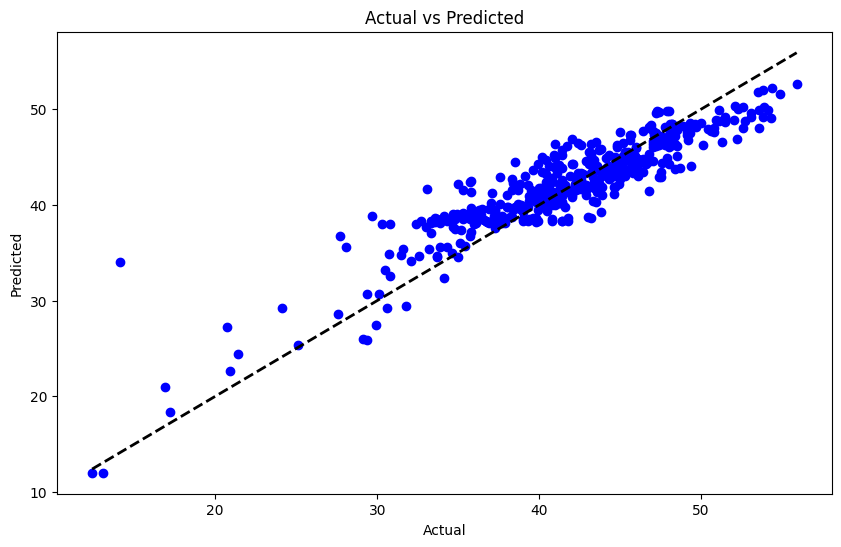

In [14]:
import matplotlib.pyplot as plt

# Make predictions on the test set using the best model
y_pred_best = RandomForestR_pipeline.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()